# Convenient Sites to Set up a Coffee Shop
### Finding strategic locations in the neighborhoods of Toronto, Canada to establish a Coffee Shop using K-Means Clustering


Installing and Importing Important Libraries

In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import bs4 as bs
import folium
from sklearn.cluster import KMeans
import urllib.request
from geopy.geocoders import Nominatim
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

## Data Collection and Cleaning

Importing Wikipedia page for Postal Codes, CSV file for Coordinates, Excel file for Demographic data

In [7]:
sauce= urllib.request.urlopen('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050').read()
coord=pd.read_csv('Geospatial_Coordinates.csv')
demo = pd.read_excel('demographics-nhs-indicators-2011.xlsx')
demodf=pd.DataFrame(demo,columns=['Neighbourhood','Total Population','  Median household total income $','    Unemployed','Youth15-24'])
demodf.rename(columns = {'Neighbourhood':'Neighborhood','  Median household total income $':'Income','    Unemployed':'Unemployment','Youth15-24':'Youth'},inplace = True)
demodf["Neighborhood"] = demodf["Neighborhood"].str.replace('-','')
demodf

,Neighborhood,Total Population,Income,Unemployment,Youth
0,West HumberClairville,34100,66241,1750,5405
1,Mount OliveSilverstoneJamestown,32790,49934,2175,5020
2,ThistletownBeaumond Heights,10140,62042,530,1350
3,RexdaleKipling,10485,56545,590,1315
4,ElmsOld Rexdale,9550,50846,575,1380
...,...,...,...,...,...
135,West Hill,26550,49713,1675,3925
136,Woburn,53350,52018,3310,7580
137,Eglinton East,22830,46495,1490,3080
138,Scarborough Village,16615,42131,1035,2460


In [8]:
soup=bs.BeautifulSoup(sauce,'lxml')
table = soup.find('table')
table_rows=table.find_all('tr')

columns=['Postal Code','Borough','Neighborhood']
table_data=[]
for tr in table_rows:
        td=tr.find_all('td')
        table_data.append([i.text for i in td])

In [9]:
nb_df=pd.DataFrame(table_data, columns=columns)
nb_df = nb_df.drop(0)
nb_df["Postal Code"] = nb_df["Postal Code"].str.replace('\n','')
nb_df["Borough"] = nb_df["Borough"].str.replace('\n','')
nb_df["Neighborhood"] = nb_df["Neighborhood"].str.replace('\n','')
nb_df["Neighborhood"] = nb_df["Neighborhood"].str.replace('-',' ')
nb_df1=nb_df
nb_df1.drop(nb_df1[nb_df1['Borough'] == 'Not assigned'].index, inplace = True) 
nb_df.reset_index(drop=True, inplace=True)
nb_df1

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West
206,M8Z,Etobicoke,Mimico NW
207,M8Z,Etobicoke,The Queensway West
208,M8Z,Etobicoke,Royal York South West


In [10]:
df=pd.merge(nb_df1, coord, on='Postal Code').drop(['Borough'], axis = 1) 
df = pd.merge(df, demodf, on='Neighborhood', how='left').dropna(how='any', axis=0).reset_index(drop=True)
df

,Postal Code,Neighborhood,Latitude,Longitude,Total Population,Income,Unemployment,Youth
0,M4A,Victoria Village,43.725882,-79.315572,17180.0,47529.0,915.0,1900.0
1,M1B,Rouge,43.806686,-79.194353,45905.0,81553.0,2475.0,6940.0
2,M1B,Malvern,43.806686,-79.194353,45085.0,57528.0,2905.0,6960.0
3,M1C,Highland Creek,43.784535,-79.160497,13100.0,98087.0,645.0,2060.0
4,M3C,Flemingdon Park,43.725900,-79.340923,22165.0,46554.0,1585.0,3085.0
5,M9C,Markland Wood,43.643515,-79.577201,10435.0,74376.0,450.0,1165.0
6,M1E,Guildwood,43.763573,-79.188711,9815.0,76055.0,325.0,1075.0
7,M1E,Morningside,43.763573,-79.188711,17585.0,54746.0,1110.0,2835.0
8,M1E,West Hill,43.763573,-79.188711,26550.0,49713.0,1675.0,3925.0
9,M4E,The Beaches,43.676357,-79.293031,21135.0,85028.0,845.0,2125.0


### Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'ZIJXZA03G40O5RUNZGACY0W5TOKA2XDXOZPZYUTTSQSBSMQF' # your Foursquare ID
CLIENT_SECRET = '3Q3EJCB03YG01AVKXBENR0ANDWFL1JTGMYTHXJKSK3B4QLR3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZIJXZA03G40O5RUNZGACY0W5TOKA2XDXOZPZYUTTSQSBSMQF
CLIENT_SECRET:3Q3EJCB03YG01AVKXBENR0ANDWFL1JTGMYTHXJKSK3B4QLR3


### Explore Postal Codes in Toronto

In [12]:
LIMIT = 100 
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Victoria Village
Rouge
Malvern
Highland Creek
Flemingdon Park
Markland Wood
Guildwood
Morningside
West Hill
The Beaches
Woburn
Hillcrest Village
Bathurst Manor
Thorncliffe Park
Scarborough Village
Henry Farm
Little Portugal
Ionview
Kennedy Park
Bayview Village
Oakridge
Humber Summit
Cliffcrest
Mount Dennis
Weston
Dorset Park
Forest Hill North
Willowdale West
Roncesvalles
Agincourt North
Milliken
New Toronto
Alderwood
Long Branch


In [14]:
print(toronto_venues.shape)
toronto_venues.head()

(324, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
3,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
4,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place


In [15]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,2,2,2,2,2,2
Alderwood,8,8,8,8,8,8
Bathurst Manor,20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
Cliffcrest,2,2,2,2,2,2
Dorset Park,7,7,7,7,7,7
Flemingdon Park,21,21,21,21,21,21
Forest Hill North,6,6,6,6,6,6
Guildwood,7,7,7,7,7,7


In [16]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 114 uniques categories.


In [17]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,American Restaurant,Art Gallery,Asian Restaurant,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,...,Theater,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped = toronto_grouped[['Neighborhood', 'Coffee Shop','Café']]
toronto_grouped.set_index('Neighborhood', inplace=True)
toronto_grouped['Coffee Shop']=toronto_grouped['Coffee Shop']+toronto_grouped['Café']
toronto_grouped=toronto_grouped.drop(['Café'], axis = 1) 
toronto_grouped

,Coffee Shop
Neighborhood,
Agincourt North,0.000000
Alderwood,0.125000
Bathurst Manor,0.100000
Bayview Village,0.250000
Cliffcrest,0.000000
Dorset Park,0.000000
Flemingdon Park,0.095238
Forest Hill North,0.000000
Guildwood,0.000000


### Final Dataset after collection and cleaning

In [19]:
df_final = pd.merge(df, toronto_grouped, on='Neighborhood')
df_final['Unemployment'] = df_final['Unemployment'] / df['Total Population'] * 100
df_final['Youth'] = df_final['Youth'] / df['Total Population'] * 100
df_final.head()

,Postal Code,Neighborhood,Latitude,Longitude,Total Population,Income,Unemployment,Youth,Coffee Shop
0,M4A,Victoria Village,43.725882,-79.315572,17180.0,47529.0,5.325960,11.059371,0.200000
1,M1B,Rouge,43.806686,-79.194353,45905.0,81553.0,5.391570,15.118179,0.000000
2,M1B,Malvern,43.806686,-79.194353,45085.0,57528.0,6.443385,15.437507,0.000000
3,M1C,Highland Creek,43.784535,-79.160497,13100.0,98087.0,4.923664,15.725191,0.000000
4,M3C,Flemingdon Park,43.725900,-79.340923,22165.0,46554.0,7.150914,13.918340,0.095238


## Exploratory Data Analysis

In [20]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [21]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

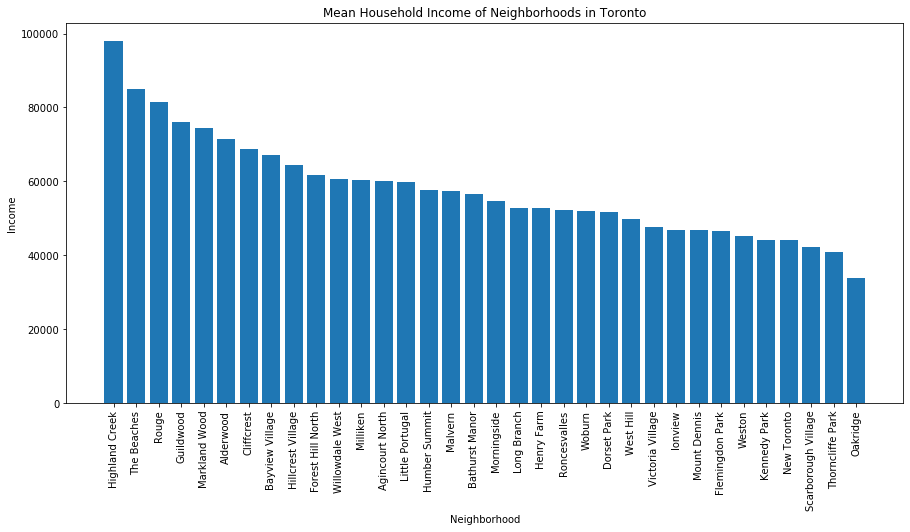

In [22]:
fig = plt.figure(figsize =(15, 7)) 
df_final.sort_values(by='Income', ascending=False, inplace=True)
plt.bar(df_final['Neighborhood'], df_final['Income']) 
plt.xlabel('Neighborhood') 
plt.ylabel('Income') 
plt.title('Mean Household Income of Neighborhoods in Toronto')
plt.xticks(rotation=90)
plt.show()

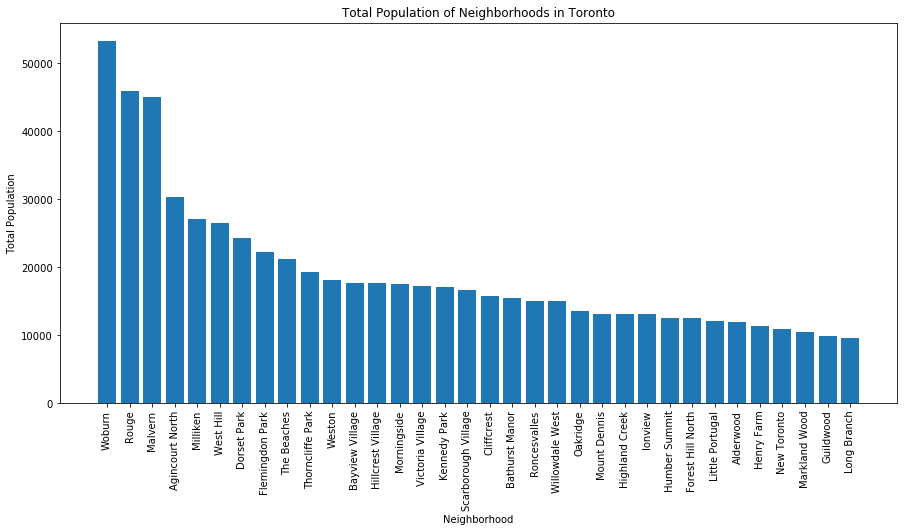

In [23]:
fig = plt.figure(figsize =(15, 7)) 
df_final.sort_values(by='Total Population', ascending=False, inplace=True)
plt.bar(df_final['Neighborhood'], df_final['Total Population']) 
plt.xlabel('Neighborhood') 
plt.ylabel('Total Population') 
plt.title('Total Population of Neighborhoods in Toronto')
plt.xticks(rotation=90)
plt.show()

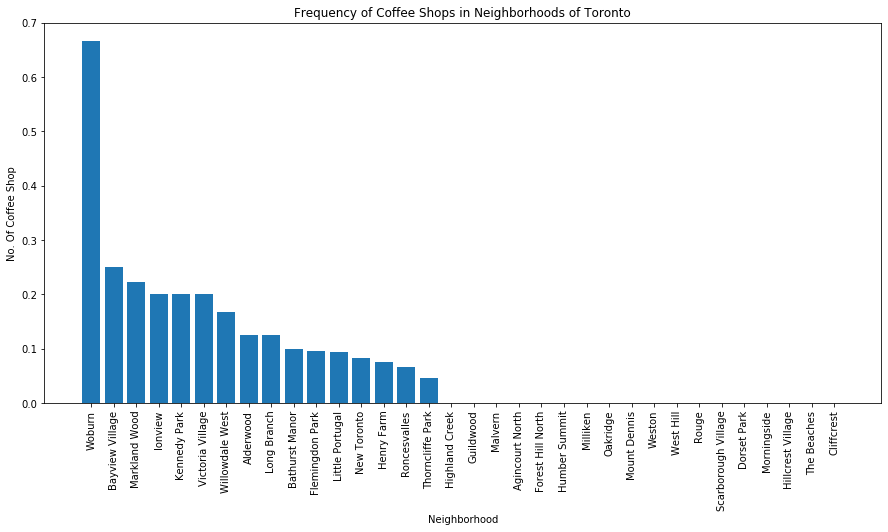

In [24]:
fig = plt.figure(figsize =(15, 7)) 
df_final.sort_values(by='Coffee Shop', ascending=False, inplace=True)
plt.bar(df_final['Neighborhood'], df_final['Coffee Shop']) 
plt.xlabel('Neighborhood') 
plt.ylabel('No. Of Coffee Shop') 
plt.title('Frequency of Coffee Shops in Neighborhoods of Toronto')
plt.xticks(rotation=90)
plt.show()

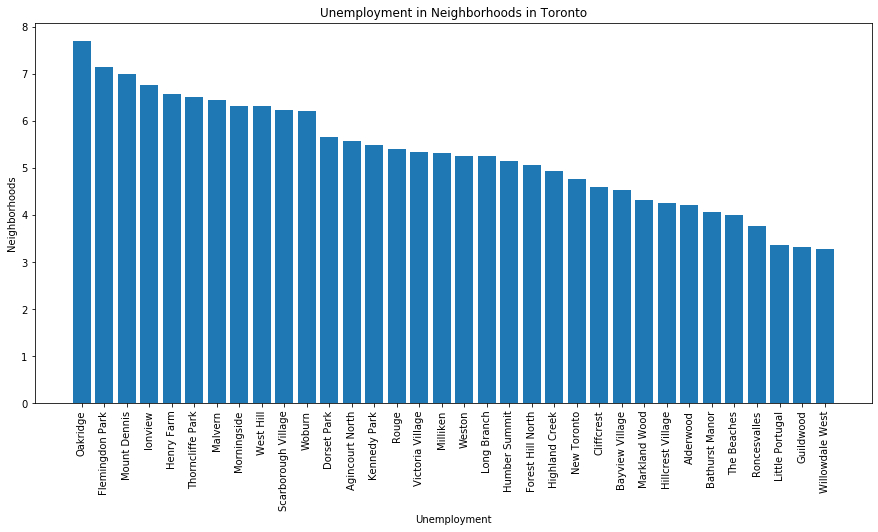

In [25]:
fig = plt.figure(figsize =(15, 7)) 
df_final.sort_values(by='Unemployment', ascending=False, inplace=True)
plt.bar(df_final['Neighborhood'], df_final['Unemployment']) 
plt.xlabel('Unemployment') 
plt.ylabel('Neighborhoods') 
plt.title('Unemployment in Neighborhoods in Toronto')
plt.xticks(rotation=90)
plt.show()

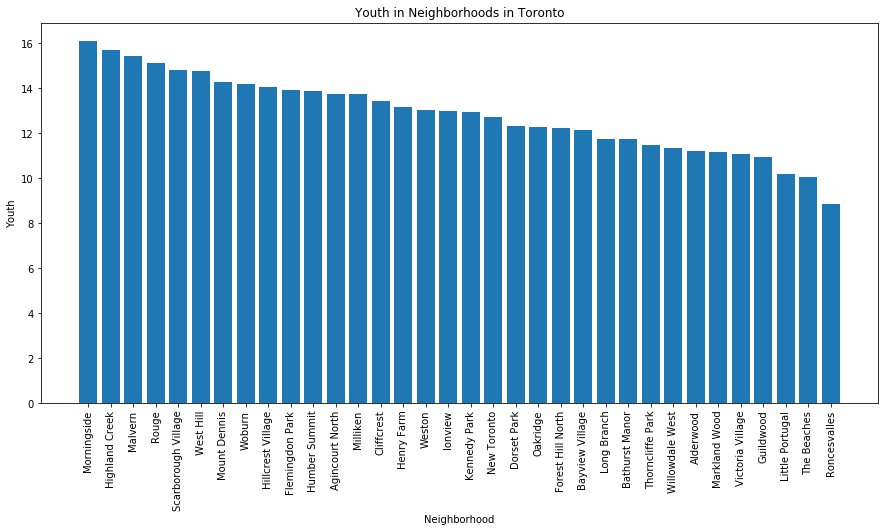

In [26]:
fig = plt.figure(figsize =(15, 7)) 
df_final.sort_values(by='Youth', ascending=False, inplace=True)
plt.bar(df_final['Neighborhood'], df_final['Youth']) 
plt.xlabel('Neighborhood') 
plt.ylabel('Youth') 
plt.title('Youth in Neighborhoods in Toronto')
plt.xticks(rotation=90)
plt.show()

### Final Dataset after Exploratory Data Analysis

In [27]:
df_final=df_final.drop(['Unemployment','Youth'], axis = 1)
df_final.head()

,Postal Code,Neighborhood,Latitude,Longitude,Total Population,Income,Coffee Shop
7,M1E,Morningside,43.763573,-79.188711,17585.0,54746.0,0.0
3,M1C,Highland Creek,43.784535,-79.160497,13100.0,98087.0,0.0
2,M1B,Malvern,43.806686,-79.194353,45085.0,57528.0,0.0
1,M1B,Rouge,43.806686,-79.194353,45905.0,81553.0,0.0
14,M1J,Scarborough Village,43.744734,-79.239476,16615.0,42131.0,0.0


## Predictive Model Building

### Normalizing dataset

In [28]:
from sklearn.preprocessing import StandardScaler
X = df_final.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.54598432e-01, -2.23910181e-01, -6.19200405e-01],
       [-5.88156407e-01,  2.94758361e+00, -6.19200405e-01],
       [ 2.50378380e+00, -2.03362967e-02, -6.19200405e-01],
       [ 2.58305193e+00,  1.73770201e+00, -6.19200405e-01],
       [-2.48366824e-01, -1.14701750e+00, -6.19200405e-01],
       [ 7.12034176e-01, -5.92201828e-01, -6.19200405e-01],
       [-5.83322985e-01, -8.04556757e-01, -6.19200405e-01],
       [ 3.30274850e+00, -4.23532596e-01,  4.55025047e+00],
       [-1.48314983e-01,  4.91452254e-01, -6.19200405e-01],
       [ 2.88143045e-01, -8.23362828e-01,  1.19292577e-01],
       [-6.43257421e-01, -1.45705079e-03, -6.19200405e-01],
       [ 1.07260748e+00,  1.72407633e-01, -6.19200405e-01],
       [ 7.71001927e-01,  1.79725170e-01, -6.19200405e-01],
       [-3.36818451e-01,  7.93300663e-01, -6.19200405e-01],
       [-7.58292870e-01, -3.75456377e-01, -3.17628057e-02],
       [-9.80473918e-02, -9.28369487e-01, -6.19200405e-01],
       [-5.88639749e-01, -7.94019504e-01

In [29]:
df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'Total Population', 1:'Income', 2:'No. of Coffee Shops'}, inplace=True)
df_normalized.head()

,Total Population,Income,No. of Coffee Shops
0,-0.154598,-0.223910,-0.6192
1,-0.588156,2.947584,-0.6192
2,2.503784,-0.020336,-0.6192
3,2.583052,1.737702,-0.6192
4,-0.248367,-1.147017,-0.6192


### k-Means Clustering

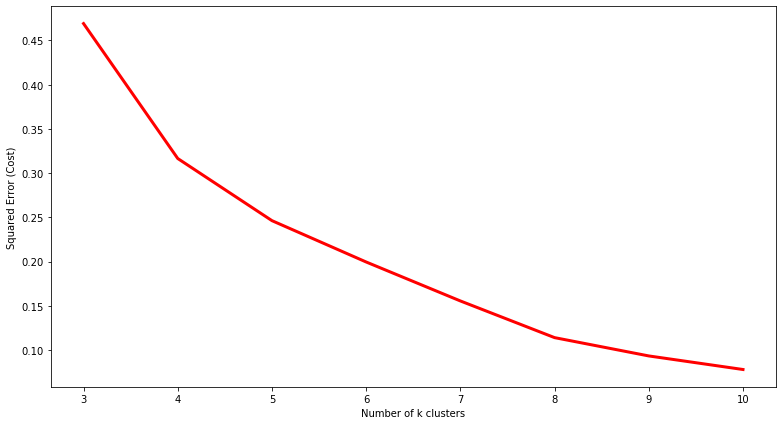

In [30]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

In [31]:
pip install yellowbrick

     |████████████████████████████████| 266kB 6.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc680a397b8>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


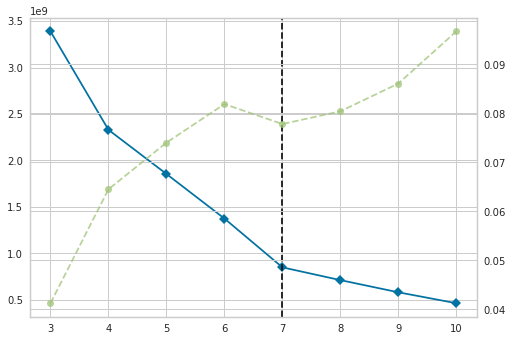

In [32]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))
visualizer.fit(X)
visualizer

In [33]:
kclusters = 6
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_normalized)
kmeans.labels_[0:10]

array([0, 2, 5, 5, 0, 4, 0, 1, 4, 0], dtype=int32)

In [34]:
df_clustered = pd.merge(df_final, df_normalized, left_index=True, right_index=True)
df_clustered.insert(0, 'Cluster Label', kmeans.labels_)
df_clustered=df_clustered.drop(columns=['Total Population_y','Income_y','No. of Coffee Shops'])
df_clustered

,Cluster Label,Postal Code,Neighborhood,Latitude,Longitude,Total Population_x,Income_x,Coffee Shop
7,0,M1E,Morningside,43.763573,-79.188711,17585.0,54746.0,0.000000
3,2,M1C,Highland Creek,43.784535,-79.160497,13100.0,98087.0,0.000000
2,5,M1B,Malvern,43.806686,-79.194353,45085.0,57528.0,0.000000
1,5,M1B,Rouge,43.806686,-79.194353,45905.0,81553.0,0.000000
14,0,M1J,Scarborough Village,43.744734,-79.239476,16615.0,42131.0,0.000000
8,4,M1E,West Hill,43.763573,-79.188711,26550.0,49713.0,0.000000
23,0,M6M,Mount Dennis,43.691116,-79.476013,13150.0,46811.0,0.000000
10,1,M1G,Woburn,43.770992,-79.216917,53350.0,52018.0,0.666667
11,4,M2H,Hillcrest Village,43.803762,-79.363452,17650.0,64522.0,0.000000
4,0,M3C,Flemingdon Park,43.725900,-79.340923,22165.0,46554.0,0.095238


In [35]:
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Neighborhood'], df_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)      
map_clusters

## Final Clusters

In [36]:
df_clustered.loc[df_clustered['Cluster Label'] == 0]

,Cluster Label,Postal Code,Neighborhood,Latitude,Longitude,Total Population_x,Income_x,Coffee Shop
7,0,M1E,Morningside,43.763573,-79.188711,17585.0,54746.0,0.000000
14,0,M1J,Scarborough Village,43.744734,-79.239476,16615.0,42131.0,0.000000
23,0,M6M,Mount Dennis,43.691116,-79.476013,13150.0,46811.0,0.000000
4,0,M3C,Flemingdon Park,43.725900,-79.340923,22165.0,46554.0,0.095238
21,0,M9L,Humber Summit,43.756303,-79.565963,12530.0,57786.0,0.000000
15,0,M2J,Henry Farm,43.778517,-79.346556,11340.0,52675.0,0.075758
24,0,M9N,Weston,43.706876,-79.518188,18170.0,45119.0,0.000000
31,0,M8V,New Toronto,43.605647,-79.501321,10905.0,44141.0,0.083333
20,0,M1L,Oakridge,43.711112,-79.284577,13505.0,33980.0,0.000000
26,0,M5P,Forest Hill North,43.696948,-79.411307,12475.0,61596.0,0.000000


In [37]:
df_clustered.loc[df_clustered['Cluster Label'] == 1].head()

,Cluster Label,Postal Code,Neighborhood,Latitude,Longitude,Total Population_x,Income_x,Coffee Shop
10,1,M1G,Woburn,43.770992,-79.216917,53350.0,52018.0,0.666667


In [38]:
df_clustered.loc[df_clustered['Cluster Label'] == 2]

,Cluster Label,Postal Code,Neighborhood,Latitude,Longitude,Total Population_x,Income_x,Coffee Shop
3,2,M1C,Highland Creek,43.784535,-79.160497,13100.0,98087.0,0.0
22,2,M1M,Cliffcrest,43.716316,-79.239476,15700.0,68647.0,0.0
6,2,M1E,Guildwood,43.763573,-79.188711,9815.0,76055.0,0.0
9,2,M4E,The Beaches,43.676357,-79.293031,21135.0,85028.0,0.0


In [39]:
df_clustered.loc[df_clustered['Cluster Label'] == 3]

,Cluster Label,Postal Code,Neighborhood,Latitude,Longitude,Total Population_x,Income_x,Coffee Shop
17,3,M1K,Ionview,43.727929,-79.262029,13095.0,46955.0,0.200000
18,3,M1K,Kennedy Park,43.727929,-79.262029,17050.0,44226.0,0.200000
19,3,M2K,Bayview Village,43.786947,-79.385975,17675.0,67186.0,0.250000
33,3,M8W,Long Branch,43.602414,-79.543484,9630.0,52771.0,0.125000
12,3,M3H,Bathurst Manor,43.754328,-79.442259,15435.0,56563.0,0.100000
27,3,M2R,Willowdale West,43.782736,-79.442259,15005.0,60537.0,0.166667
32,3,M8W,Alderwood,43.602414,-79.543484,11900.0,71585.0,0.125000
5,3,M9C,Markland Wood,43.643515,-79.577201,10435.0,74376.0,0.222222
0,3,M4A,Victoria Village,43.725882,-79.315572,17180.0,47529.0,0.200000
16,3,M6J,Little Portugal,43.647927,-79.419750,12055.0,59886.0,0.093023


In [40]:
df_clustered.loc[df_clustered['Cluster Label'] == 4]

,Cluster Label,Postal Code,Neighborhood,Latitude,Longitude,Total Population_x,Income_x,Coffee Shop
8,4,M1E,West Hill,43.763573,-79.188711,26550.0,49713.0,0.0
11,4,M2H,Hillcrest Village,43.803762,-79.363452,17650.0,64522.0,0.0
29,4,M1V,Agincourt North,43.815252,-79.284577,30280.0,60162.0,0.0
30,4,M1V,Milliken,43.815252,-79.284577,27160.0,60262.0,0.0
25,4,M1P,Dorset Park,43.757410,-79.273304,24360.0,51724.0,0.0


In [41]:
df_clustered.loc[df_clustered['Cluster Label'] == 5]

,Cluster Label,Postal Code,Neighborhood,Latitude,Longitude,Total Population_x,Income_x,Coffee Shop
2,5,M1B,Malvern,43.806686,-79.194353,45085.0,57528.0,0.0
1,5,M1B,Rouge,43.806686,-79.194353,45905.0,81553.0,0.0
